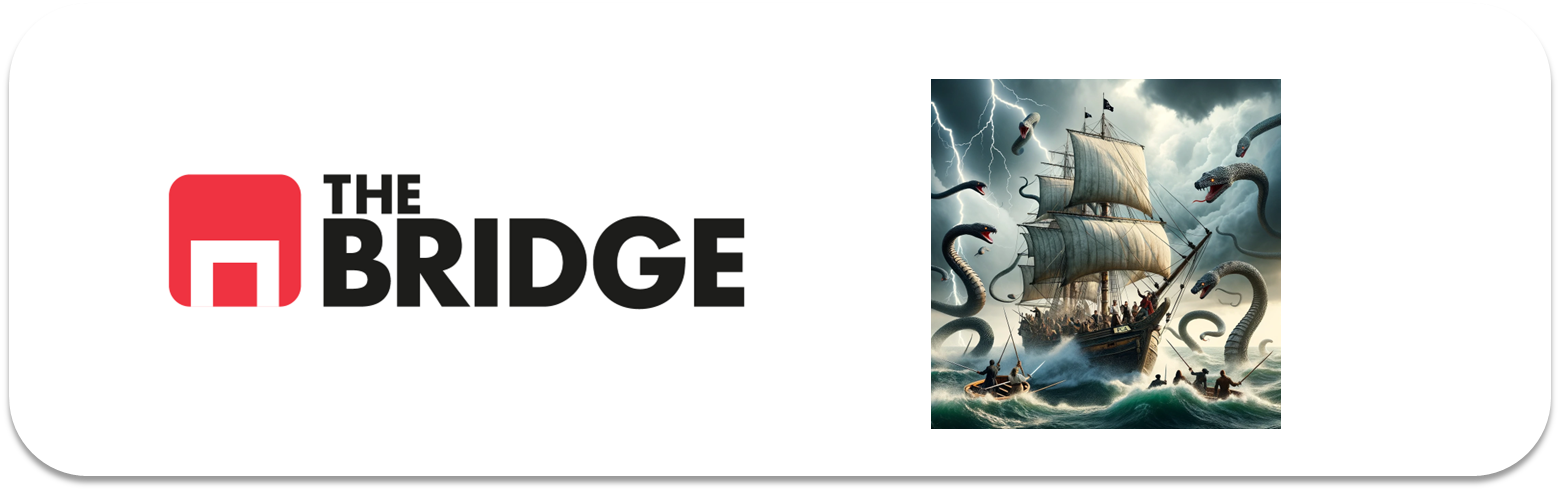

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:

import xgboost as xgb
import bootcampviztools as bt
import pandas as pd
import numpy as np
import funciones as fs
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler


### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [62]:
df = pd.read_csv("./data/credit_npo.csv")
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,12537.0,0.068916,0.253321,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,12537.0,0.330359,0.368148,0.0,0.030651,0.163490,0.582219,6.0
age,12537.0,52.079445,15.077498,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,12537.0,0.409588,4.055787,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,12537.0,1.902253,9.122216,0.0,0.142268,0.302025,0.506725,99.0
MonthlyIncome,11816.0,6864.815420,11855.905437,0.0,3498.750000,5416.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,12537.0,8.482332,5.165422,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,12537.0,0.259312,4.035658,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,12537.0,0.999202,1.134325,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,12537.0,0.228364,4.018873,0.0,0.000000,0.000000,0.000000,98.0


In [65]:
fs.describe_df(df).T

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
COL_N,,,,
SeriousDlqin2yrs,int64,0.0,2,0.0
RevolvingUtilizationOfUnsecuredLines,float64,0.0,10764,0.86
age,int64,0.0,78,0.01
NumberOfTime30-59DaysPastDueNotWorse,int64,0.0,10,0.0
DebtRatio,float64,0.0,11547,0.92
MonthlyIncome,float64,5.8,4167,0.31
NumberOfOpenCreditLinesAndLoans,int64,0.0,43,0.0
NumberOfTimes90DaysLate,int64,0.0,13,0.0
NumberRealEstateLoansOrLines,int64,0.0,16,0.0


| Variable                                    | Descripción                                                                               |
|---------------------------------------------|-------------------------------------------------------------------------------------------|
| **SeriousDlqin2yrs**                        | Indicador binario (0 o 1) de morosidad grave en los últimos dos años                      |
| **RevolvingUtilizationOfUnsecuredLines**    | Porcentaje de utilización de líneas de crédito no aseguradas (revolving)                  |
| **age**                                     | Edad del individuo                                                                        |
| **NumberOfTime30-59DaysPastDueNotWorse**    | Número de veces que el individuo ha estado 30-59 días en mora (pero no más grave)         |
| **DebtRatio**                               | Ratio deuda-ingresos: la proporción de la deuda mensual respecto al ingreso mensual       |
| **MonthlyIncome**                           | Ingreso mensual del individuo                                                             |
| **NumberOfOpenCreditLinesAndLoans**         | Número de líneas de crédito y préstamos abiertos                                          |
| **NumberOfTimes90DaysLate**                 | Número de veces que el individuo ha estado 90 días en mora                                |
| **NumberRealEstateLoansOrLines**            | Número de préstamos o líneas de crédito inmobiliarios                                     |
| **NumberOfTime60-89DaysPastDueNotWorse**    | Número de veces que el individuo ha estado 60-89 días en mora (pero no más grave)         |
| **NumberOfDependents**                      | Número de dependientes del individuo                                                      |


In [66]:
target = "SeriousDlqin2yrs"

In [67]:
# TRAIN-TEST

train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [68]:
# 1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

train_set = train_set.dropna()

train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9458 entries, 5441 to 7270
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      9458 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  9458 non-null   float64
 2   age                                   9458 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  9458 non-null   int64  
 4   DebtRatio                             9458 non-null   float64
 5   MonthlyIncome                         9458 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       9458 non-null   int64  
 7   NumberOfTimes90DaysLate               9458 non-null   int64  
 8   NumberRealEstateLoansOrLines          9458 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  9458 non-null   int64  
 10  NumberOfDependents                    9458 non-null   float64
dtypes: float64(4), int6

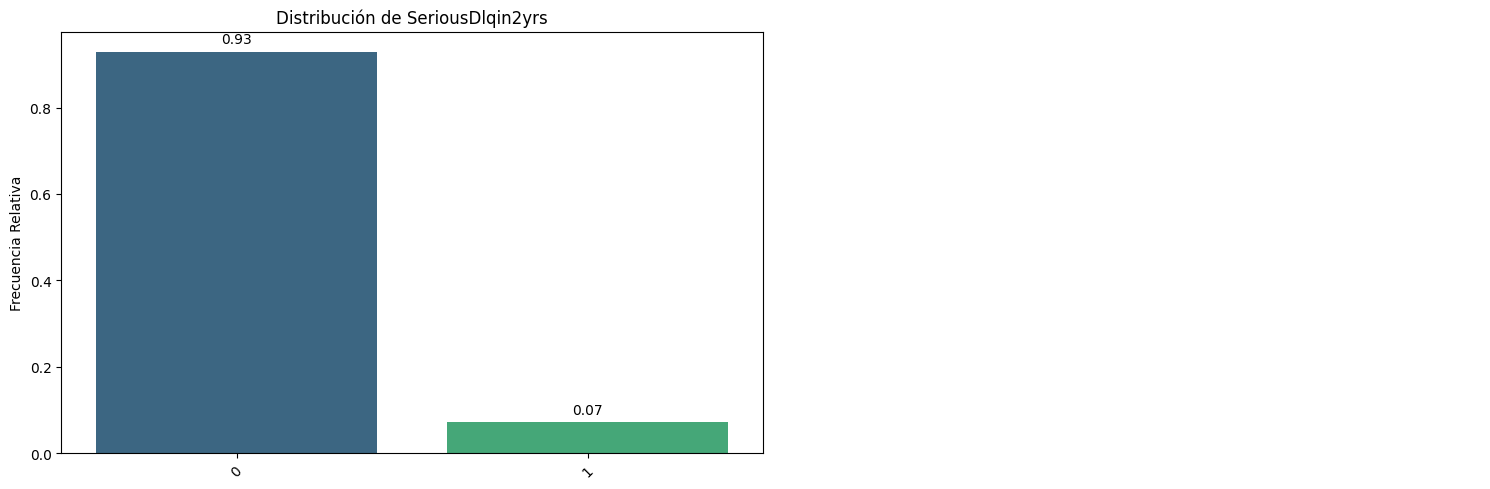

In [69]:
bt.pinta_distribucion_categoricas(train_set, [target], True, True) # Desequilibrios importantes

(10, 2)


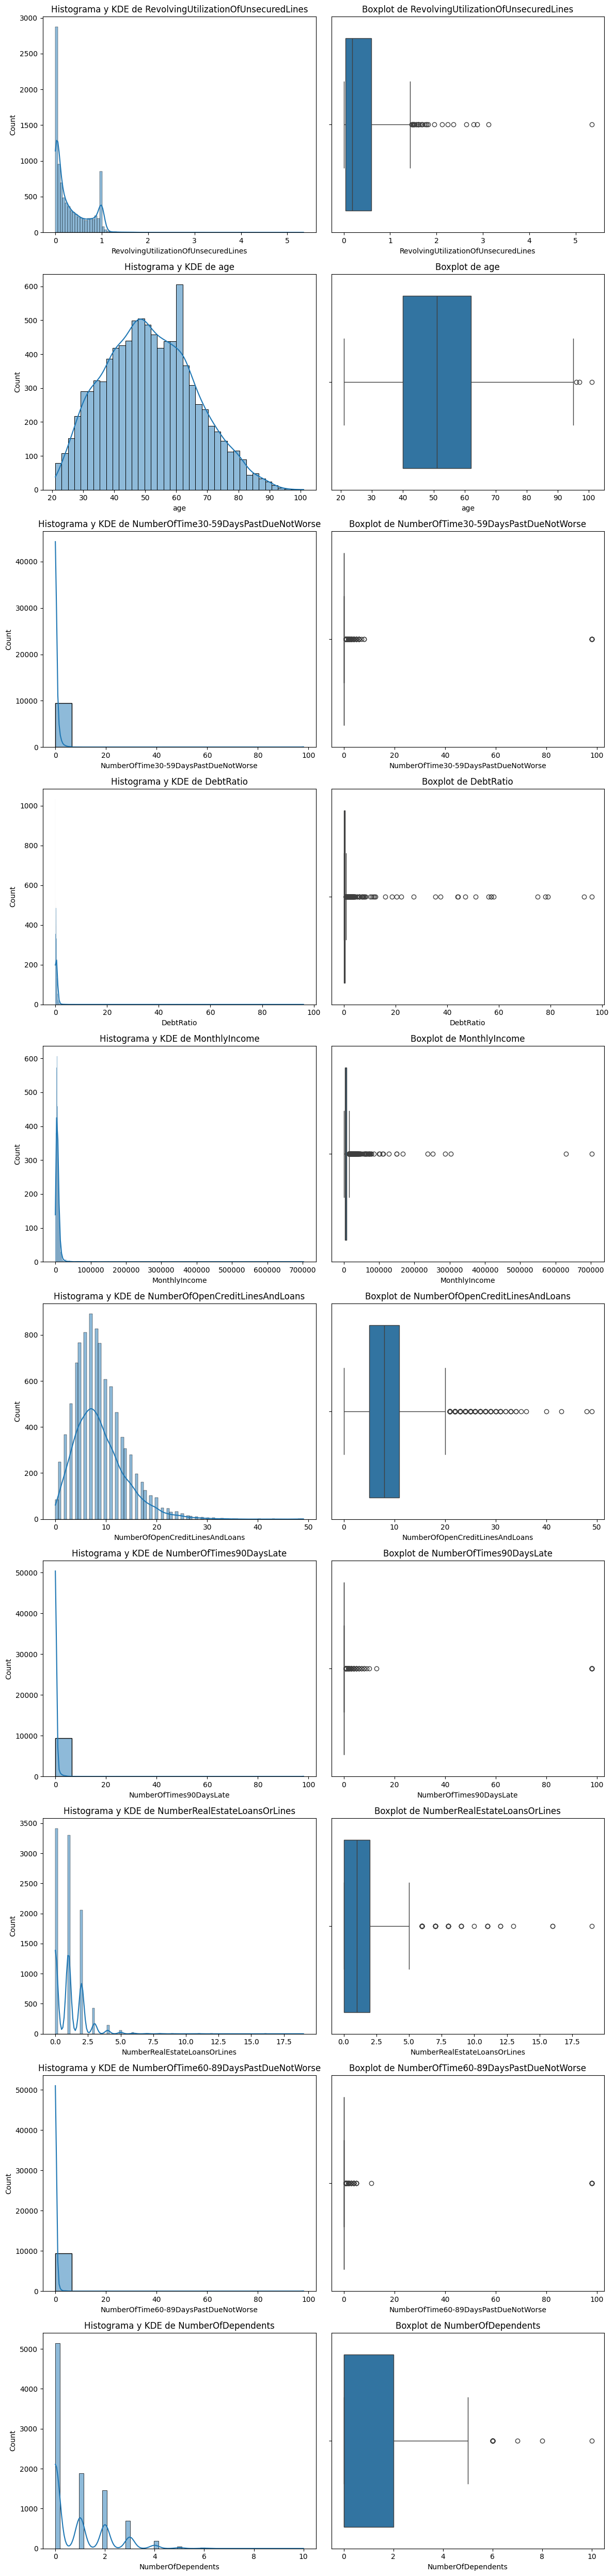

In [70]:
bt.plot_combined_graphs(train_set,[col for col in train_set.columns if col != target])

In [71]:
train_set["NumberOfTime30-59DaysPastDueNotWorse"].value_counts(True).sort_index()

NumberOfTime30-59DaysPastDueNotWorse
0     0.830725
1     0.115669
2     0.033411
3     0.010467
4     0.004969
5     0.002009
6     0.001586
7     0.000106
8     0.000211
98    0.000846
Name: proportion, dtype: float64

In [72]:
train_set.loc[:, "NumberOfTime30-59DaysPastDueNotWorse"] = train_set["NumberOfTime30-59DaysPastDueNotWorse"].apply(lambda x: 0 if x == 0 else 1)


In [73]:
train_set["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0    7857
1    1601
Name: count, dtype: int64

In [76]:
train_set[train_set[target] == 1]["NumberOfTime30-59DaysPastDueNotWorse"].value_counts(True)

NumberOfTime30-59DaysPastDueNotWorse
0    0.514837
1    0.485163
Name: proportion, dtype: float64

In [11]:
train_set["NumberOfTime60-89DaysPastDueNotWorse"].value_counts().sort_index()

NumberOfTime60-89DaysPastDueNotWorse
0     8969
1      381
2       70
3       12
4       13
5        4
11       1
98       8
Name: count, dtype: int64

In [12]:
train_set.loc[:, "NumberOfTime60-89DaysPastDueNotWorse"] = train_set["NumberOfTime60-89DaysPastDueNotWorse"].apply(lambda x: 0 if x == 0 else 1)

In [13]:
train_set["NumberOfTime60-89DaysPastDueNotWorse"].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0    8969
1     489
Name: count, dtype: int64

In [14]:
train_set.NumberOfTimes90DaysLate.value_counts().sort_index()

NumberOfTimes90DaysLate
0     8931
1      318
2      110
3       43
4       25
5        9
6        5
7        3
8        3
9        1
10       1
13       1
98       8
Name: count, dtype: int64

In [15]:
train_set.loc[:, "NumberOfTimes90DaysLate"] = train_set["NumberOfTimes90DaysLate"].apply(lambda x: 0 if x == 0 else 1)

In [16]:
train_set.NumberOfTimes90DaysLate.value_counts()

NumberOfTimes90DaysLate
0    8931
1     527
Name: count, dtype: int64

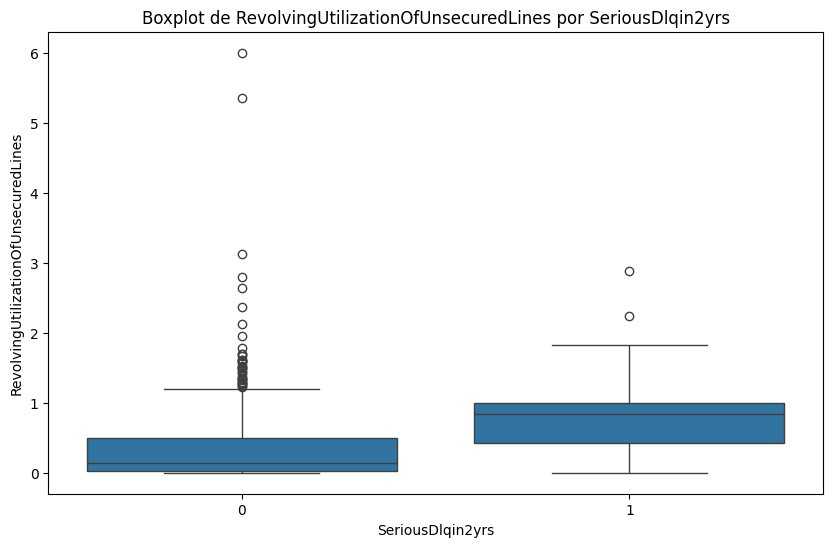

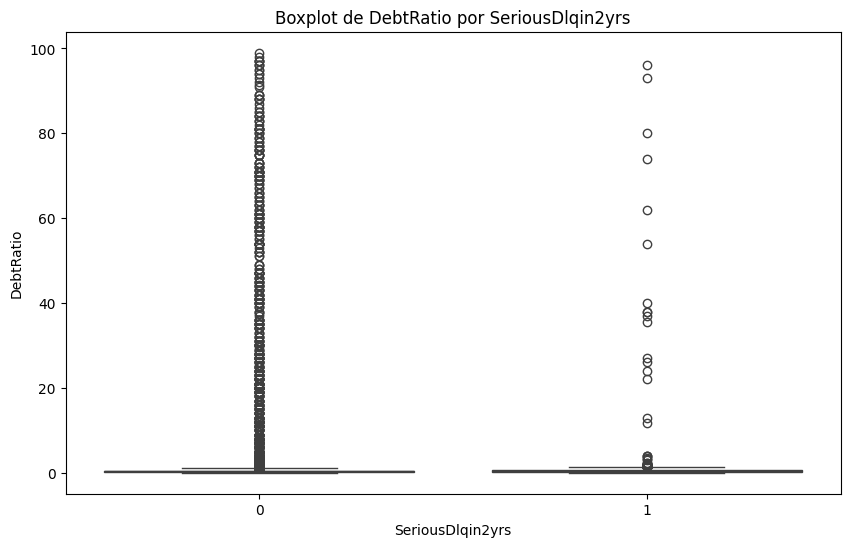

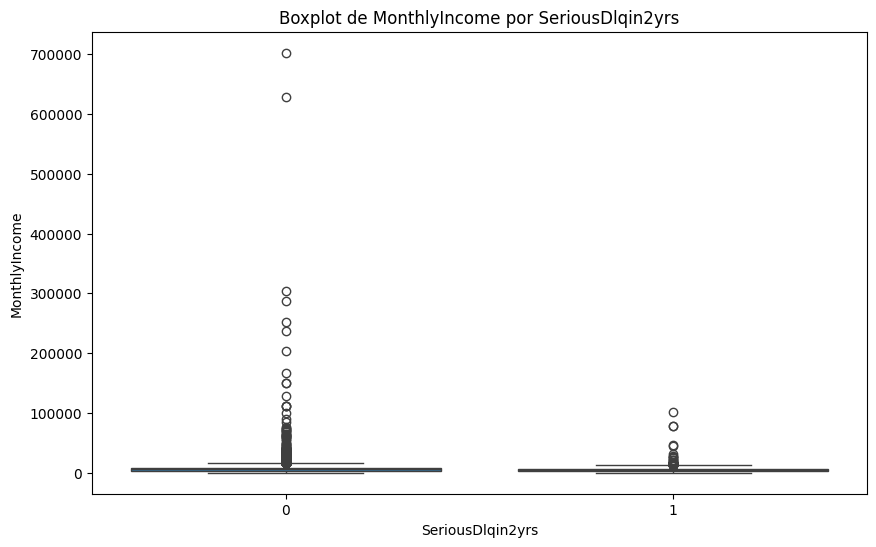

In [17]:
#2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
#    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.

features_num = ["RevolvingUtilizationOfUnsecuredLines", "DebtRatio", "MonthlyIncome"]
features_cat = ["age", "NumberOfOpenCreditLinesAndLoans","NumberOfTimes90DaysLate", "NumberRealEstateLoansOrLines", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfDependents"]

# Crear un boxplot para cada característica numérica
for feature in features_num:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target, y=feature, data=df)
    plt.title(f'Boxplot de {feature} por {target}')
    plt.show()

In [ ]:
for col in features_cat:
    bt.plot_categorical_numerical_relationship(train_set, target, col)

# diferencias destacables en las 3

In [ ]:
features_visual = features_cat.copy()

<Axes: >

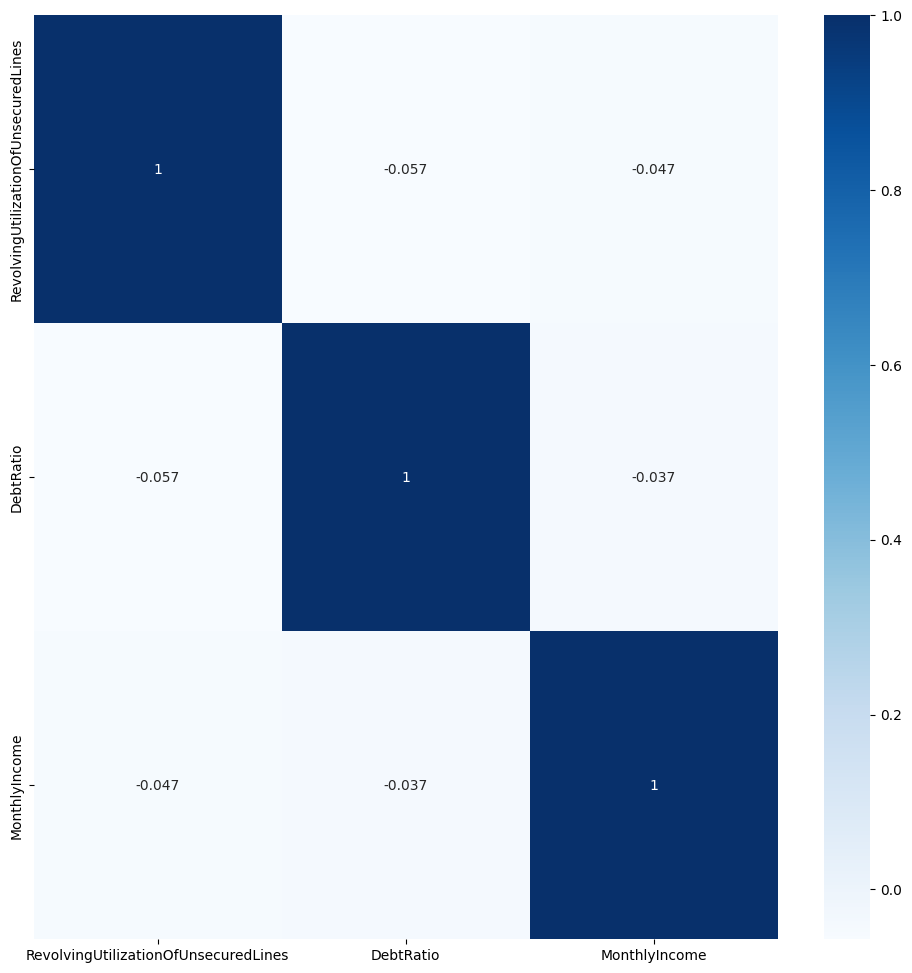

In [18]:
corr= df[features_num].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr[features_num], annot=True, cmap="Blues")

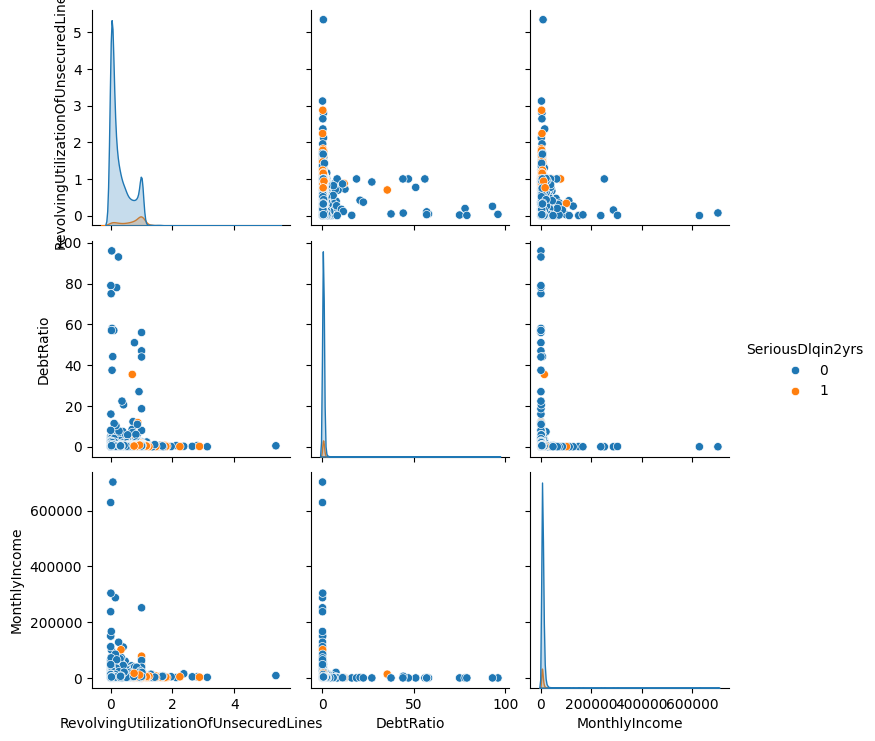

In [19]:
sns.pairplot(train_set[features_num + [target]], hue= target)

In [20]:
train_set.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
5441,0,0.089036,51,0,0.749850,5000.0,6,0,2,0,2.0
8819,0,0.000000,28,1,0.081024,2850.0,4,0,0,0,0.0
315,0,1.000000,40,0,0.956566,5916.0,2,0,2,0,2.0
10746,0,0.409016,61,0,0.427967,16533.0,15,0,3,0,1.0
5199,0,0.933489,51,0,0.979579,6218.0,10,0,2,0,3.0


In [ ]:
features_visuales = ["N30-59"]

In [21]:
# 2. Selección de features numéricas mediante SelectKBest y ANOVA, 

from sklearn.feature_selection import SelectKBest, f_classif

'''
f_classif realiza un test ANOVA
a técnica de análisis de varianza (ANOVA) también conocida como análisis factorial 
y desarrollada por Fisher en 1930,constituye la herramienta básica para el estudio 
del efecto de uno o más factores (cada uno con dos o más niveles) sobre la media de 
una variable continua. Es por lo tanto el test estadístico a emplear cuando se 
desea comparar las medias de dos o más grupos.
'''
#features_num.remove("quality")
X_train = train_set[features_num]
y_train = train_set[target]
selector = SelectKBest(f_classif, k=5)
x_data_kbest = selector.fit_transform(X_train, y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, 
                             columns = selector.get_feature_names_out())
X_train_kbest.head()

c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=5 is greater than n_features=3. All the features will be returned.
  warnings.warn(


,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome
0,0.089036,0.749850,5000.0
1,0.000000,0.081024,2850.0
2,1.000000,0.956566,5916.0
3,0.409016,0.427967,16533.0
4,0.933489,0.979579,6218.0


In [22]:

# selecció de features categóricas mediante Mutual Information

from sklearn.metrics import mutual_info_score
features_cat = ["age", "NumberOfOpenCreditLinesAndLoans","NumberOfTimes90DaysLate", "NumberRealEstateLoansOrLines", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfDependents"]
target = "SeriousDlqin2yrs"
df_mi = train_set.dropna()
for col in features_cat:
    print(f"MI({col};{target}):", mutual_info_score(df_mi[col],df_mi[target]))

MI(age;SeriousDlqin2yrs): 0.011742158681766797
MI(NumberOfOpenCreditLinesAndLoans;SeriousDlqin2yrs): 0.005765492938063559
MI(NumberOfTimes90DaysLate;SeriousDlqin2yrs): 0.03263430404615937
MI(NumberRealEstateLoansOrLines;SeriousDlqin2yrs): 0.0025197053229454843
MI(NumberOfTime60-89DaysPastDueNotWorse;SeriousDlqin2yrs): 0.01901776135395085
MI(NumberOfDependents;SeriousDlqin2yrs): 0.0013220294075707768


In [ ]:
# features_filter = list(selector.get_feature_names_out())

features_1_2 = ["RevolvingUtilizationOfUnsecuredLines","DebtRatio","MonthlyIncome","NumberOfTimes90DaysLate","NumberOfTime60-89DaysPastDueNotWorse"]

In [83]:
# 3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_selector = RandomForestClassifier(random_state= 42, class_weight="balanced")

In [84]:
rf_selector.fit(train_set,train_set[target])

RandomForestClassifier(class_weight='balanced', random_state=42)

In [85]:
rf_selector.feature_importances_[rf_selector.feature_importances_ > 
rf_selector.feature_importances_.mean()]

array([0.75243098])

In [86]:
from sklearn.feature_selection import SelectFromModel

In [87]:
selector_model = SelectFromModel(estimator = rf_selector, threshold= "median") 
# El modelo debe tener un atributo feature_importances_ o un atributo coef_

In [88]:
selector_model.fit(train_set,train_set[target]) 

SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced',
                                                 random_state=42),
                threshold='median')

In [30]:
selector_model.get_feature_names_out()

array(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype=object)

In [78]:
features_1_3 = list(selector_model.get_feature_names_out())
features_1_3

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [79]:
# 4. Selección de las mejores features empleando RFE.
from sklearn.feature_selection import RFE

X_train = train_set.copy()
y_train = train_set[target]

rf_RFE = RandomForestClassifier(random_state= 42, class_weight="balanced") 
# Puedes usar tu modelo, o modelos a probar o un modelo "proxy" como en la selección por modelo

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 6, 
          step = 1) # Elimina de una en una, pero es configurable

rfe.fit(X_train, y_train)
print(rfe.ranking_)
df_98 = pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = train_set.columns).sort_values("ranking")

[1 1 1 1 2 3 4 1 5 1 6]


In [80]:
df_98

,ranking
SeriousDlqin2yrs,1
RevolvingUtilizationOfUnsecuredLines,1
age,1
NumberOfTime30-59DaysPastDueNotWorse,1
NumberOfTimes90DaysLate,1
NumberOfTime60-89DaysPastDueNotWorse,1
DebtRatio,2
MonthlyIncome,3
NumberOfOpenCreditLinesAndLoans,4
NumberRealEstateLoansOrLines,5


In [81]:
features_1_4 = df_98[df_98.ranking == 1].index.tolist()
features_1_4

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [82]:
# 5. Selección de las mejores features empleando SFS.
from sklearn.feature_selection import SequentialFeatureSelector

rf_SFS = RandomForestClassifier(random_state = 42, class_weight="balanced")

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 6,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(X_train, y_train)

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(class_weight='balanced',
                                                           random_state=42),
                          n_features_to_select=6, scoring='balanced_accuracy')

In [89]:
print("Elegidasd SFS:", sfs_forward.get_feature_names_out())

Elegidasd SFS: ['SeriousDlqin2yrs' 'RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberOfTime30-59DaysPastDueNotWorse' 'DebtRatio' 'MonthlyIncome']


In [90]:
features_1_5 = sfs_forward.get_feature_names_out()
features_1_5

array(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome'], dtype=object)

In [38]:
# 6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.
from xgboost import XGBClassifier

clf1 = LogisticRegression()
clf2 = RandomForestClassifier()


In [39]:
# Creamos el VotingClassifier con hard voting:

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2)], voting='hard')

In [40]:
from sklearn.model_selection import cross_val_score

# Lista de conjuntos de características relevantes
opciones = [features_1_2, features_1_3, features_1_4, features_1_5]

# Resultados de los scores
resultados = []

# Iterar sobre cada conjunto de características
for i in opciones:
    X_train = train_set[i]
    y_train = train_set[target]
    
    # Calcular las puntuaciones de validación cruzada
    scores = cross_val_score(eclf, X_train, y_train, cv=5, scoring="recall")
    
    # Guardar los resultados
    resultados.append((i, scores.mean()))

    # Imprimir los resultados
    for result in resultados:
        print(f"Features: {result[0]} - Recall: {result[1]}")



c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Features: ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'] - Recall: 0.07417357656163626
Features: ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'] - Recall: 0.07417357656163626
Features: ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'] - Recall: 1.0


c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Features: ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'] - Recall: 0.07417357656163626
Features: ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'] - Recall: 1.0
Features: ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'] - Recall: 1.0


c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Features: ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'] - Recall: 0.07417357656163626
Features: ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'] - Recall: 1.0
Features: ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'] - Recall: 1.0
Features: ['SeriousDlqin2yrs' 'RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberOfTime30-59DaysPastDueNotWorse' 'DebtRatio' 'MonthlyIncome'] - Recall: 0.9822111663902708


In [41]:
train_set

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
5441,0,0.089036,51,0,0.749850,5000.0,6,0,2,0,2.0
8819,0,0.000000,28,1,0.081024,2850.0,4,0,0,0,0.0
315,0,1.000000,40,0,0.956566,5916.0,2,0,2,0,2.0
10746,0,0.409016,61,0,0.427967,16533.0,15,0,3,0,1.0
5199,0,0.933489,51,0,0.979579,6218.0,10,0,2,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
11964,0,0.170065,46,0,0.224818,3166.0,9,0,0,0,3.0
5191,0,0.308691,62,0,0.181409,2000.0,5,0,0,0,0.0
5390,0,0.020559,70,1,0.235168,4651.0,9,0,1,0,0.0
860,0,0.318365,41,0,0.443259,6000.0,9,0,2,0,3.0


In [42]:
test_set

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
9525,0,0.281116,69,0,0.162186,4500.0,10,0,0,0,1.0
2984,0,0.000000,38,0,0.987605,2500.0,6,0,2,0,1.0
6247,0,0.037880,29,1,0.257721,4500.0,10,0,0,0,0.0
9931,0,1.109863,56,0,0.111349,1400.0,1,1,0,1,0.0
7354,0,0.410206,59,0,1.574739,2200.0,6,0,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,0,0.151457,37,0,0.138972,5000.0,10,0,0,0,0.0
6522,0,0.869042,62,0,0.453104,6556.0,11,0,1,0,0.0
10692,0,0.000694,47,2,0.538731,2000.0,7,0,1,0,1.0
8291,0,0.519150,50,0,0.362577,7465.0,15,0,1,0,1.0


In [43]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,9458.0,0.071262,0.257276,0.0,0.000000,0.000000,0.000000,1.000000
RevolvingUtilizationOfUnsecuredLines,9458.0,0.338143,0.365444,0.0,0.034978,0.179376,0.595311,5.347652
age,9458.0,51.376189,14.513264,21.0,40.000000,51.000000,62.000000,101.000000
NumberOfTime30-59DaysPastDueNotWorse,9458.0,0.169275,0.375014,0.0,0.000000,0.000000,0.000000,1.000000
DebtRatio,9458.0,0.482447,2.600863,0.0,0.144323,0.294157,0.477842,96.000000
MonthlyIncome,9458.0,6899.357158,12785.807976,0.0,3481.000000,5415.500000,8290.750000,702500.000000
NumberOfOpenCreditLinesAndLoans,9458.0,8.761789,5.112939,0.0,5.000000,8.000000,11.000000,49.000000
NumberOfTimes90DaysLate,9458.0,0.055720,0.229392,0.0,0.000000,0.000000,0.000000,1.000000
NumberRealEstateLoansOrLines,9458.0,1.057200,1.152625,0.0,0.000000,1.000000,2.000000,19.000000
NumberOfTime60-89DaysPastDueNotWorse,9458.0,0.051702,0.221437,0.0,0.000000,0.000000,0.000000,1.000000


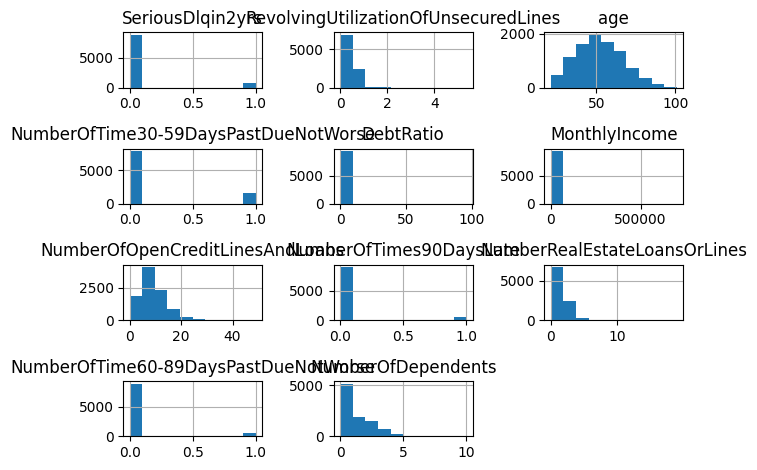

In [44]:
# Valorar si standiramos las variables

train_set.hist()
plt.tight_layout()

In [45]:
features_to_transform = ["RevolvingUtilizationOfUnsecuredLines", "DebtRatio", "MonthlyIncome"]

train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()


for col in features_to_transform:
    desplaza = 0
    if train_set_scaled[col].min() <= 0:
        desplaza = int(abs(train_set_scaled[col].min())) + 1
    train_set_scaled[col] = np.log(train_set_scaled[col] + desplaza)
    test_set_scaled[col] = np.log(test_set_scaled[col] + desplaza)


scaler = StandardScaler()

train_set_scaled[features_num] = scaler.fit_transform(train_set_scaled[features_num])
test_set_scaled[features_num] = scaler.transform(test_set_scaled[features_num])


X_train = train_set.drop(columns=[target])
X_train_scaled = train_set_scaled.drop(columns=[target])
y_train = train_set[target]

X_test = test_set.drop(columns=[target])
X_test_scaled = test_set_scaled.drop(columns=[target])
y_test = test_set[target]

In [ ]:
nombres = [f"Seleccion {nombre}" for nombre in ["visual", "filter", "modelo", "rfe", "sfs", "voting"]]
model_names = ["Random Forest","XGBoost", "LightGBM"]
rf_clf = RandomForestClassifier(class_weight= "balanced", random_state= 42)
xg_clf = XGBClassifier(random_state  = 42, scale_pos_weight = len(train_set[train_set[target] == 0])/len(train_set[train_set[target] == 1]))
lgb_clf = LGBMClassifier(class_weight= "balanced", random_state= 42, verbose = -100, n_jobs= -1)
models = [rf_clf, xg_clf, lgb_clf]
resultados = []
for indice, lista in enumerate([features_visual, features_filter, features_modelo, features_RFE, features_SFS, features_hard_voting]):
    X_train = train_set[lista]
    y_train = train_set[target]
    for model_name, modelo in zip(model_names, models):
        metrica = np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring  = "balanced_accuracy"))
        data = {
            "features_list": nombres[indice],
            "model": model_name,
            "avg. recall": metrica
        }
        print(data)
        resultados.append(data.copy())
df_resultados = pd.DataFrame(resultados)
df_resultados.sort_values("avg. recall", ascending = False)

In [46]:
# 3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. 
# Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.





In [47]:
# Remove target variable from feature sets
features_1_3 = [feature for feature in features_1_3 if feature != target]
features_1_4 = [feature for feature in features_1_4 if feature != target]
features_1_5 = [feature for feature in features_1_5 if feature != target]

opciones = [features_1_2, features_1_3, features_1_4, features_1_5]
modelos = ["Logistic", "RandomF", "XGBoost"]
metricas = []

lr_clf = LogisticRegression(max_iter= 10000)
rf_clf = RandomForestClassifier(max_depth=5, random_state=42)
xgb_clf = XGBClassifier(max_depth = 5, random_state = 42)

for nombre, modelo in zip(modelos, [lr_clf, rf_clf, xgb_clf]):
    for opcion in opciones:
        print(f"Para {nombre} {opcion}:", end= " ")
        if nombre not in modelos[0:2]:
            metrica = np.mean(cross_val_score(modelo, X_train[opcion], y_train, cv=5, scoring="recall_macro"))
        else:
            metrica = np.mean(cross_val_score(modelo, X_train_scaled[opcion], y_train, cv=5, scoring="recall_macro"))
        print(metrica)
        metricas.append(metrica)

Para Logistic ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']: 0.5629423466478368
Para Logistic ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']: 0.584469640597783
Para Logistic ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']: 0.5864862488747921
Para Logistic ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome']: 0.5053631126545785
Para RandomF ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']: 0.5549363964971024
Para RandomF ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'Numb

In [48]:
# 4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test. ( XGBoost+features_1_4)

from sklearn.model_selection import GridSearchCV

param_grid = {
	'n_estimators': [100, 200, 300],
	'learning_rate': [0.01, 0.1, 0.2],
	'max_depth': [3, 4, 5]
}

xgb_clf = XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='recall_macro')

grid_search.fit(X_train_scaled[features_1_4], y_train)

grid_search.best_params_



{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}

In [49]:
xgb_clf_best = XGBClassifier(random_state=42, **grid_search.best_params_)

xgb_clf_best.fit(X_train_scaled[features_1_4], y_train)

y_pred = xgb_clf_best.predict(X_test_scaled[features_1_4])

balanced_accuracy_score(y_test, y_pred)

0.5901395738223868

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.